## Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for heatmap
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA

As you may recall from lecture, PCA is a specific application of the singular value decomposition (SVD) for matrices. If we have a data matrix $X$, we can decompose it into $U$, $\Sigma$ and $V^T$ such that $X = U \Sigma V^T$.

In [2]:
#read the data
data = pd.read_csv("https://raw.githubusercontent.com/anchalamba/STA141C/main/data/SpotifyData_cleaned.csv")
df = pd.DataFrame(data)
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,top genre new
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo,dance pop
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo,dance pop
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo,pop
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo,hip hop
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo,hip hop


### Most common top genres in our dataset

In [3]:
df["top genre new"].value_counts()

dance pop    361
pop          199
hip hop      126
other        108
rap           62
rock          39
boy band      21
edm           17
r&b           16
dance         15
country       14
house         11
indie         11
Name: top genre new, dtype: int64

In [4]:
ndf = df.loc[df['top genre new'].isin(['dance pop','hip hop', 'rap'])].reset_index()
ndf.head()

,index,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,top genre new
0,0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo,dance pop
1,1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo,dance pop
2,3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo,hip hop
3,4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo,hip hop
4,5,Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010.0,2022‑02‑17,82.0,93.0,55.0,-4.0,35.0,79.0,196.0,1.0,34.0,71.0,2010.0,Solo,hip hop


Using PCA method, we wanted to see if we were able to effectively classify genre of songs based on its features by reducing the dimensionality of the dataset. To do so, we considered 9 numerical variables ("bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch"). And we decided to focus on three genres (“dance pop”, ”hip hop”, “rap”).

This is because when we cleaned up our dataset, we merged all types of pop genres into one pop genre except the dance pop. Therefore, we thought that including pop in our model would not be the most effective way to classify genres as all features would have been mixed. After merging some genres, we had total 13 types of genres to classify, but because our dataset has less data on the rest of genres we selected (such as having 17 edm songs out of total 1000), we figured out that we would not have enough information to classify less-trending genres and not fair to classify them.

### Standardize Data

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

After reducing the data, we run our PCA on 487 rows and standardize our numerical variables onto unit scale, as mean = 0 and variance = 1 as PCA is effected by scale. 

In [5]:
from sklearn.preprocessing import StandardScaler
features = ["bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch"]
# Separating out the features
x = ndf.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Looking at 2 Principal Components 

In [6]:
from sklearn.decomposition import PCA

#PCA, assign number of components, reduce dimension from 9 to 2
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

Using built-in PCA package in sklearn, we make a dataframe with the first and the second principal component 

In [7]:
#merge the PC dataframe with the target variable
fin_df = pd.concat([principalDf, ndf[["top genre new"]]], axis = 1)
fin_df.head()

,principal component 1,principal component 2,top genre new
0,-0.401765,1.039107,dance pop
1,-2.384419,-0.531850,dance pop
2,-0.756579,-0.119886,hip hop
3,-0.095904,0.424462,hip hop
4,-1.960604,-0.443770,hip hop


### Creating Loadings matrix

In [8]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns = ['pc1', 'pc2'], index = features)
loadings_df

,pc1,pc2
bpm,-0.136447,0.042584
nrgy,-0.905690,0.083370
dnce,0.225227,-0.774277
dB,-0.835940,0.043601
live,-0.268478,0.228337
val,-0.533268,-0.542538
dur,0.117664,0.593499
acous,0.482065,0.155508
spch,0.267109,-0.301971


Get loadings for each dimension and each feature

### Loadings Plots

In [10]:
#PC1
fig = go.Figure()
fig.add_trace(go.Bar( y = loadings_df.iloc[:, 0], x = loadings_df.index, 
             marker_color='#479B55'))

fig.update_layout(
    title='PC1 Loading per Feature',
    xaxis=dict(
        title='Features',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Loading Size',
        titlefont_size=16,
        tickfont_size=14,
    )
)

In [11]:
#PC2
fig = go.Figure()
fig.add_trace(go.Bar( y = loadings_df.iloc[:, 1], x = loadings_df.index, 
             marker_color='#479B55'))

fig.update_layout(
    title='PC2 Loading per Feature',
    xaxis=dict(
        title='Features',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Loading Size',
        titlefont_size=16,
        tickfont_size=14,
    )
)

### Scatter Plot for 2 PCA

https://plotly.com/python/pca-visualization/

In [12]:
fig = px.scatter(principalComponents, x=0, y=1, color=fin_df['top genre new'], labels={"x": "Features", "y": "Loadings"}, 
                 title="2D PCA Scatter Plot with Three Genre")

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
# fig.update_layout(
#     title={
#         'text': "2D PCA Scatter Plot with Three Genre"})    

fig.show()


### Explained Variance Plot

In [26]:
#cumulative sum of explained variance by number of components
pca_a = PCA()
principalComponents_a = pca_a.fit_transform(x)

exp_var_cumul = np.cumsum(pca_a.explained_variance_ratio_)


px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},  title= "The cumulative sum of explained variance"
)

Furthermore, from plotting it seems that it is hard for us to classify genres just from having two components. Therefore, we want to see how much variance is able to explain our data as we increase the number of components to decide how many dimensions we need and to analyze. Usually, it is ideal if we could explain at least 80% of variance. Hence, it would be a good idea to keep at least 6 components (dimensions).

Overall, we conclude that PCA was not the best approach into our dataset. This is because we could not get the optimized result, we still need 7 components in order to explain 90% of variance, and we have 9 features to consider. This does not seem to be much of improvements.

## Classification Algorithms Implementation

We will use Logistic Regression and XGBoost

code reference: https://www.kaggle.com/code/lechithinh/stroke-prediction-eda-7-models-99-accuracy

In [14]:
# Separating out the features
x_og = ndf.loc[:, features].values
y = ndf.loc[:, 'top genre new'].values

#encode y variables, 0 = dance pop, 1 = hip hop, 2 = rap
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
y = ord_enc.fit_transform(y.reshape(-1, 1)).ravel()

In [15]:
#Split into test/training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_og, y, test_size=0.25, random_state=0)

#### Train the models

In [53]:
def models(X_train,Y_train):
#logistic
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000)
    log.fit(X_train, Y_train)
    
    
#xgboost
    from xgboost import XGBClassifier 
    xgboost = XGBClassifier(n_estimators=100, learning_rate = 0.001,
                        subsample=0.8, colsample_bytree=0.8, use_label_encoder =False, eval_metric = "mlogloss")
    xgboost.fit(X_train, Y_train)

#model accuracy on the training data
    print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('Xgboost Classifier Training Accuracy:', xgboost.score(X_train, Y_train))


    return log,xgboost

model = models(X_train,Y_train)

Logistic Regression Training Accuracy: 0.7396593673965937
Xgboost Classifier Training Accuracy: 0.902676399026764


#### Confusion matrix and classification report

Model  Logistic Regression


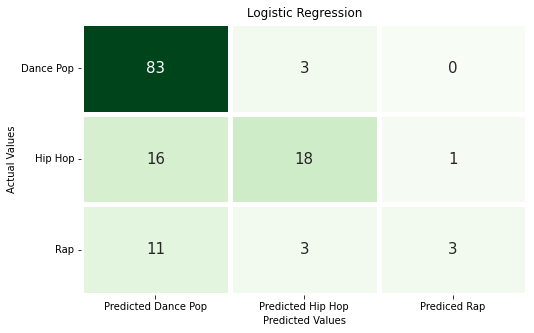


Model  XGBoost


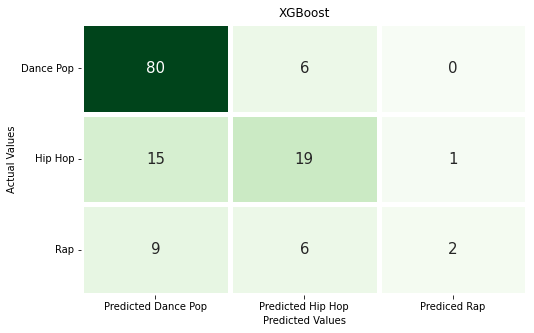


Model  Logistic Regression
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85        86
         1.0       0.75      0.51      0.61        35
         2.0       0.75      0.18      0.29        17

    accuracy                           0.75       138
   macro avg       0.75      0.55      0.58       138
weighted avg       0.75      0.75      0.72       138

0.7536231884057971

Model  XGBoost
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84        86
         1.0       0.61      0.54      0.58        35
         2.0       0.67      0.12      0.20        17

    accuracy                           0.73       138
   macro avg       0.68      0.53      0.54       138
weighted avg       0.72      0.73      0.70       138

0.7318840579710145



In [50]:
from sklearn.metrics import confusion_matrix
model_names = ['Logistic Regression', 'XGBoost']
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    print('Model ',model_names[i])
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Dance Pop', 'Hip Hop', 'Rap'], xticklabels = ['Predicted Dance Pop', 'Predicted Hip Hop', 'Prediced Rap'])
    plt.yticks(rotation = 0)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(model_names[i])
    plt.show()
    print()# Print a new line

#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ',model_names[i])
  #Check precision, recall, f1-score
    print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
    print(accuracy_score(Y_test, model[i].predict(X_test)))
    print()#Print a new line

### Implenting PCA as a Preprocessing Algorithm in Classification Algorithm

reference: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
tX_train = scaler.transform(X_train)
tX_test = scaler.transform(X_test)

In [56]:
#Fitting PCA on test and training X
pca_new = PCA(n_components = 6)
pca_new.fit(tX_train)
#apply transform to both
tX_train = pca_new.transform(tX_train)
tX_test= pca_new.transform(tX_test)

#### Train the model on PCA

In [57]:
def models(X_train,Y_train):
  
 #logistic
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000)
    log.fit(tX_train, Y_train)
    
 #xgboost
    from xgboost import XGBClassifier 
    xgboost = XGBClassifier(n_estimators=100, learning_rate = 0.001,
                        subsample=0.8, colsample_bytree=0.8, use_label_encoder =False, eval_metric = "mlogloss")
    xgboost.fit(tX_train, Y_train)
    
    
    
#model accuracy on the training data
    print('Logistic Regression Training Accuracy:', log.score(tX_train, Y_train))
    print('Xgboost Classifier Training Accuracy:', xgboost.score(tX_train, Y_train))


    return log,xgboost

model = models(tX_train,Y_train)

Logistic Regression Training Accuracy: 0.7250608272506083
Xgboost Classifier Training Accuracy: 0.8734793187347932


#### Confusion matrix and classification report

Model  Logistic Regression


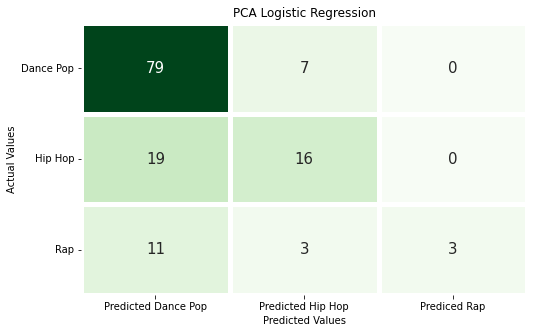


Model  XGBoost


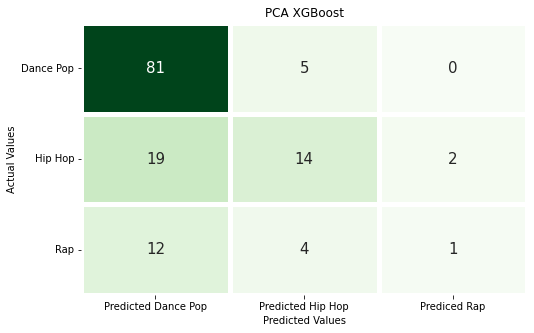


Model  Logistic Regression
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        86
         1.0       0.62      0.46      0.52        35
         2.0       1.00      0.18      0.30        17

    accuracy                           0.71       138
   macro avg       0.78      0.52      0.54       138
weighted avg       0.73      0.71      0.67       138

0.7101449275362319

Model  XGBoost
              precision    recall  f1-score   support

         0.0       0.72      0.94      0.82        86
         1.0       0.61      0.40      0.48        35
         2.0       0.33      0.06      0.10        17

    accuracy                           0.70       138
   macro avg       0.56      0.47      0.47       138
weighted avg       0.65      0.70      0.64       138

0.6956521739130435



In [58]:
from sklearn.metrics import confusion_matrix
model_names = ['Logistic Regression','XGBoost']
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(tX_test))
    
    print('Model ',model_names[i])
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Dance Pop', 'Hip Hop', 'Rap'], xticklabels = ['Predicted Dance Pop', 'Predicted Hip Hop', 'Prediced Rap'])
    plt.yticks(rotation = 0)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('PCA '+ model_names[i])
    plt.show()

    print()# Print a new line

#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ',model_names[i])
  #Check precision, recall, f1-score
    print( classification_report(Y_test, model[i].predict(tX_test)) )
  #Another way to get the models accuracy on the test data
    print( accuracy_score(Y_test, model[i].predict(tX_test)))
    print()#Print a new line